In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
exclude = [
        'Diamond Princess',
        'Grand Princess',
        'American Samoa',
        'Virgin Islands',
        'Northern Mariana Islands',
        'Puerto Rico',
    ]

In [3]:
def global_cases():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum(axis=0)
global_cases()

Confirmed    100276548.0
Deaths         2157482.0
Recovered     55387771.0
Active        42729067.0
dtype: float64

In [4]:
def cases_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=False)
cases_by_country()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,25445583,425252,0,25018483.0
Brazil,8933356,218878,7896290,818188.0
India,10689527,153724,10359305,176498.0
Mexico,1788905,152016,1348660,288229.0
United Kingdom,3700268,100359,9160,3590749.0
...,...,...,...,...
Solomon Islands,17,0,10,7.0
Marshall Islands,4,0,4,0.0
Samoa,2,0,2,0.0


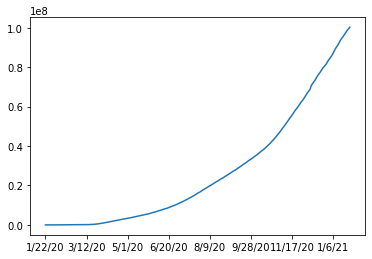

In [5]:
def global_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_confirmed_timeseries().plot()

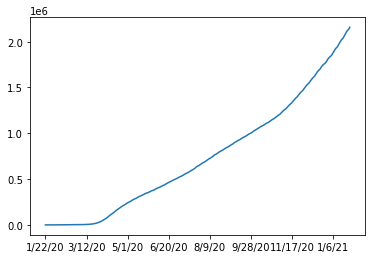

In [6]:
def global_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_deaths_timeseries().plot()

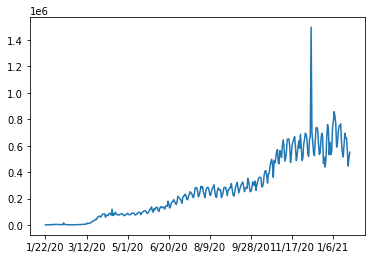

In [7]:
def global_new_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_confirmed_timeseries().plot()

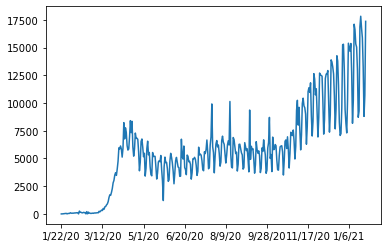

In [8]:
def global_new_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_deaths_timeseries().plot()

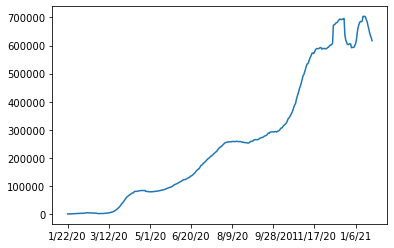

In [9]:
def global_new_confirmed_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_confirmed_14day_moving_average().plot()

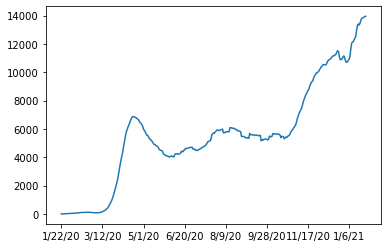

In [10]:
def global_new_deaths_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_deaths_14day_moving_average().plot()

In [11]:
def global_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,23961423,24104028,24281012,24463591,24656646,24846678,25016816,25147891,25298986,25445583
India,0,0,0,0,0,0,0,0,1,1,...,10571773,10581823,10595639,10610883,10625428,10639684,10654533,10667736,10676838,10689527
Brazil,0,0,0,0,0,0,0,0,0,0,...,8488099,8511770,8573864,8638249,8697368,8753920,8816254,8844577,8871393,8933356
Russia,0,0,0,0,0,0,0,0,0,2,...,3530379,3552888,3574330,3595136,3616680,3637862,3658447,3679247,3698246,3716228
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,3405740,3443350,3476804,3515796,3553773,3594094,3627746,3657857,3680101,3700268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS Zaandam,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Marshall Islands,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
Samoa,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [12]:
def global_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,397628,399033,401807,406184,410387,414147,417476,419251,421168,425252
Brazil,0,0,0,0,0,0,0,0,0,0,...,209847,210299,211491,212831,214147,215243,216445,217037,217664,218878
India,0,0,0,0,0,0,0,0,0,0,...,152419,152556,152718,152869,153032,153184,153339,153470,153587,153724
Mexico,0,0,0,0,0,0,0,0,0,0,...,140704,141248,142832,144371,146174,147614,149084,149614,150273,152016
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,89429,90031,91643,93469,94765,96166,97518,98129,98723,100359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dominica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Solomon Islands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def global_new_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,...,177404.0,142605.0,176984.0,182579.0,193055.0,190032.0,170138.0,131075.0,151095.0,146597.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33040.0,23671.0,62094.0,64385.0,59119.0,56552.0,62334.0,28323.0,26816.0,61963.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,84287.0,34291.0,41576.0,44357.0,42885.0,0.0,0.0,93822.0,36435.0
France,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,37405.0,3798.0,23895.0,26877.0,22710.0,23324.0,23924.0,18436.0,4300.0,22143.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,38670.0,37610.0,33454.0,38992.0,37977.0,40321.0,33652.0,30111.0,22244.0,20167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solomon Islands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Somalia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
South Sudan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,10.0,59.0,11.0,15.0,0.0,0.0,0.0,0.0,0.0


In [14]:
global_new_confirmed_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.333333,0.25,0.8,0.666667,0.571429,0.714286,0.714286,0.857143,...,217703.142857,207509.142857,200472.857143,193716.857143,187728.285714,180489.000000,176113.857143,169495.428571,170708.285714,166367.285714
Brazil,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,54615.571429,54308.285714,54032.428571,54530.428571,53296.285714,51489.714286,51599.285714,50925.428571,51374.714286,51356.000000
Spain,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,28829.142857,32095.571429,33360.285714,33747.000000,34958.285714,35342.285714,35342.285714,35342.285714,36704.428571,37010.714286
France,0.0,0.0,0.666667,0.75,0.6,0.500000,0.571429,0.714286,0.714286,0.428571,...,18318.142857,18315.571429,18917.714286,19338.428571,19521.142857,19757.000000,23133.285714,20423.428571,20495.142857,20244.857143
United Kingdom,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,...,46338.857143,45101.000000,43359.000000,42120.428571,40573.714286,38350.285714,37239.428571,36016.714286,33821.571429,31923.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solomon Islands,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Somalia,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.571429,2.571429,2.571429,2.571429,0.000000,0.000000,1.428571,1.428571,1.428571,1.428571
South Sudan,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.285714,5.857143,13.142857,14.714286,16.857143,16.857143,16.857143,13.571429,12.142857,3.714286


In [15]:
def global_new_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1751.0,1405.0,2774.0,4377.0,4203.0,3760.0,3329.0,1775.0,1917.0,4084.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,463.0,544.0,1584.0,1539.0,1803.0,1440.0,1470.0,530.0,659.0,1743.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,682.0,602.0,1612.0,1826.0,1296.0,1401.0,1352.0,611.0,594.0,1636.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,551.0,452.0,1192.0,1340.0,1316.0,1096.0,1202.0,592.0,627.0,1214.0
South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.0,344.0,839.0,566.0,647.0,575.0,498.0,300.0,243.0,680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dominica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cambodia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
global_new_deaths_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3324.857143,3239.000000,2997.285714,3056.285714,3095.285714,3088.857143,3085.571429,3089.000000,3162.142857,3349.285714
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999.714286,982.857143,1021.428571,1064.857143,1179.714286,1227.428571,1263.285714,1272.857143,1289.285714,1312.000000
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1123.142857,1133.571429,1185.857143,1222.714286,1228.857143,1245.428571,1253.000000,1242.857143,1241.714286,1245.142857
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,963.857143,959.857143,971.571429,981.000000,1007.428571,999.571429,1021.285714,1027.142857,1052.142857,1055.285714
South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,563.142857,552.857143,564.857143,530.571429,521.285714,515.571429,531.857143,538.428571,524.000000,501.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Burundi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dominica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cambodia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


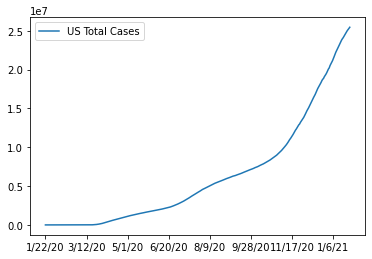

In [17]:
def us_total_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Cases': df})
us_total_confirmed_cases().plot()

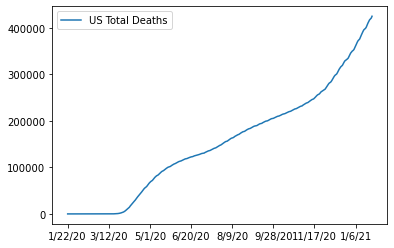

In [18]:
def us_total_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Deaths': df})
us_total_deaths().plot()

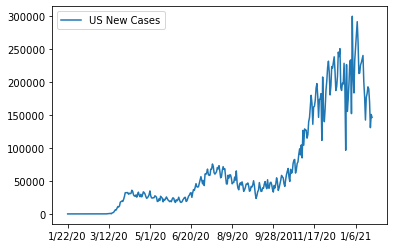

In [19]:
def us_new_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'US New Cases': df})
us_new_confirmed_cases().plot()

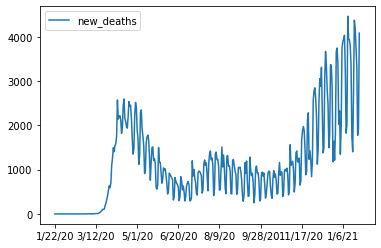

In [20]:
def us_new_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'new_deaths': df})
us_new_deaths().plot()

,new_confirmed
Province_State,
California,21823
Texas,21197
New York,11040
Florida,9594
Georgia,8393
New Jersey,4830
Arizona,4748
Virginia,4707
Pennsylvania,4663


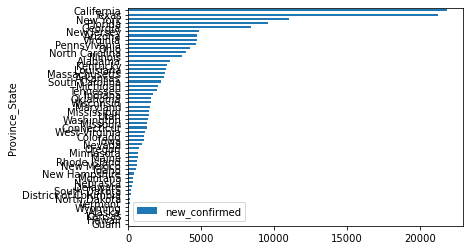

In [21]:
def new_confirmed_cases_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_confirmed'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_confirmed'], ascending=False)
new_confirmed_cases_by_state().sort_values(['new_confirmed'], ascending=True).plot.barh()
new_confirmed_cases_by_state()

,new_deaths
Province_State,
California,725
Texas,330
Alabama,234
Florida,227
Pennsylvania,225
Arizona,209
Tennessee,192
New York,182
Georgia,179


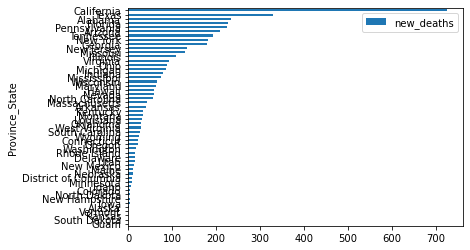

In [22]:
def new_deaths_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_deaths'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_deaths'], ascending=False)
new_deaths_by_state().sort_values(['new_deaths'], ascending=True).plot.barh()
new_deaths_by_state()

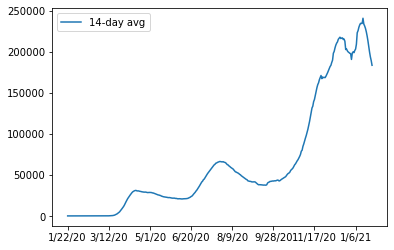

In [23]:
def us_new_cases_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_cases_14day_moving_avg().plot()

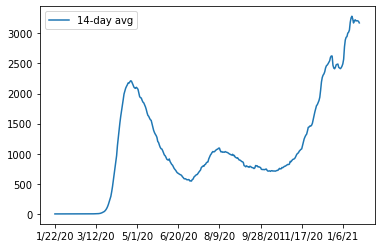

In [24]:
def us_new_deaths_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_deaths_14day_moving_avg().plot()

In [25]:
def confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,422598,424028,426543,429655,432536,436087,439442,441170,443009,445909
Alaska,0,0,0,0,0,0,0,0,0,0,...,51938,52093,52222,52393,52605,52901,53150,53315,53399,53487
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,673882,679282,685699,690544,699942,708041,715357,722574,727895,732643
Arkansas,0,0,0,0,0,0,0,0,0,0,...,271154,272263,273594,276114,279220,281382,282995,284066,284702,287187
California,0,0,0,0,2,2,2,2,2,3,...,3014428,3043005,3078551,3097632,3122705,3147207,3168028,3187475,3213222,3235045
Colorado,0,0,0,0,0,0,0,0,0,0,...,374981,376171,377856,379227,381210,383008,384966,386285,387500,388620
Connecticut,0,0,0,0,0,0,0,0,0,0,...,223422,230125,232219,234134,235796,237815,237815,237815,243632,244899
Delaware,0,0,0,0,0,0,0,0,0,0,...,70294,70910,71311,71775,72523,73233,73915,74575,75191,75490


In [26]:
def deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,6120,6121,6126,6283,6379,6486,6657,6660,6662,6896
Alaska,0,0,0,0,0,0,0,0,0,0,...,229,229,230,253,254,254,259,259,259,260
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,11266,11265,11266,11528,11772,12001,12170,12238,12239,12448
Arkansas,0,0,0,0,0,0,0,0,0,0,...,4311,4343,4386,4441,4496,4549,4563,4606,4650,4690
California,0,0,0,0,0,0,0,0,0,0,...,33615,33746,34441,35060,35796,36362,36846,37121,37543,38268
Colorado,0,0,0,0,0,0,0,0,0,0,...,5379,5386,5388,5422,5440,5462,5482,5505,5512,5517
Connecticut,0,0,0,0,0,0,0,0,0,0,...,6594,6670,6682,6726,6774,6819,6819,6819,6911,6934
Delaware,0,0,0,0,0,0,0,0,0,0,...,1016,1016,1021,1026,1027,1027,1036,1041,1049,1065


In [27]:
def new_confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1917.0,1430.0,2515.0,3112.0,2881.0,3551.0,3355.0,1728.0,1839.0,2900.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.0,155.0,129.0,171.0,212.0,296.0,249.0,165.0,84.0,88.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6981.0,5400.0,6417.0,4845.0,9398.0,8099.0,7316.0,7217.0,5321.0,4748.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,976.0,1109.0,1331.0,2520.0,3106.0,2162.0,1613.0,1071.0,636.0,2485.0
California,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,31279.0,28577.0,35546.0,19081.0,25073.0,24502.0,20821.0,19447.0,25747.0,21823.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1498.0,1190.0,1685.0,1371.0,1983.0,1798.0,1958.0,1319.0,1215.0,1120.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6703.0,2094.0,1915.0,1662.0,2019.0,0.0,0.0,5817.0,1267.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,922.0,616.0,401.0,464.0,748.0,710.0,682.0,660.0,616.0,299.0


In [28]:
def new_deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,157.0,96.0,107.0,171.0,3.0,2.0,234.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,23.0,1.0,0.0,5.0,0.0,0.0,1.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,-1.0,1.0,262.0,244.0,229.0,169.0,68.0,1.0,209.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,32.0,43.0,55.0,55.0,53.0,14.0,43.0,44.0,40.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,207.0,131.0,695.0,619.0,736.0,566.0,484.0,275.0,422.0,725.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,7.0,2.0,34.0,18.0,22.0,20.0,23.0,7.0,5.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,76.0,12.0,44.0,48.0,45.0,0.0,0.0,92.0,23.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,5.0,1.0,0.0,9.0,5.0,8.0,16.0
